**Student**: Marco Defilippi 

**Class**: MIT-ADSP

**Project**: Capstone Project

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

**1. Problem Definition**

This project aims to create a computer vision model to accurately detect facial emotions. This is a challenging yet rewarding project that involves multiple stages, such as preprocessing, model selection, training and evaluation. Facial emotion recognition is particularly important because it does not require advanced equipment and allows to acquire the data with simply a camera. The increase in available data and computing power has led to the use of deep learning techniques, providing interesting results. 
This task is not a typical classification task like any other, because there is not a clear distiction of the classes.  Typical classification is based on the concept that there is a corret answer, but in facial emotion recognition it is more important how people interpret them. In fact, the same face could be interpreted as expressing different emotions. In addition, the same facial expression could also show multiple emotions at the same time. That is the reason why this project is really challenging and therefore, it is needed to understand if more advanced models can address the peculiarities of facial emotions. A good classifier should be able to understand expressions not just as distict categories, but als oas  combinations of emotions. 

This project is of great interest, because facial emotion recognition is becoming ever more important in many fields, from social robotics to healtchare. All of this arises from the asumption tht relations with other people is vital in the life ef every person nd the verbal communication is not more important than all thse even imperceptible movements that are part of body language. One of the most important ways by which people interact with each other is through emotions and in particular, as confirmd from recent researches, the 55% of sentiments takes place through facial emotions. Therefore, the importance of solving facial emotion recognition problems lies in the potential improvements in human lives, in human-computer interations in order to contribute to societ well-being. 

The goal of this project is firstly to develope a baseline model and from this, make improvements by using more complex models in order to establish the best model able to better classify 4 basic emotions: happy, sad, surpire and neutral. This project also aims to analyze hte results of our model in terms of accuracy for each class. 
The final model should be able, given an input image that contains one emotions belonging to one of the 4 basic emotions, to generate an output that correctly labels the input image. 

A fundamental step, as in every kind of machine learning/deep learning task, is the choice of the datasets to be used for training and validation. 
For this project, the dataset is provided and already splitted into the train, validation and test set. 
Generally, a good dataset should have a number of examples sufficients for deep learning applications, being balanced and contain pictures taken in wildly different conditions in order to alow the network to properly generalize. To this end, a comparison between the results obtained from the original datasets and augmented dataset is performed in order to understand the limits of using a dataset that does not properly represent the variability of real-life situations. 
It will be also interesting to understand if data augmentation should be applied on the training set only, or if it makes sense to perform it for the validation set as well. As first intuition, the idea is to evaluate the model's performance on data that represents the true distribution of the data it will encounter in the real world, without artificial augmentation. If this is not applied, the final validation accuracy could be higher than the training accuracy because of the non-augmented cleaner validation set.

Neural netowrks are chosen as the main technology for the classifiers, but they can not be too complex due to hardware and time limitations, but should try to fully exploit the techniques that are most known in the state of the art. In this project, different test are performed, exploring different architectures and parameters, in order to find the best possible netwrks for this task.  

The final network model should be analyzed in order to evaluate its generalization power, asses the reliability of the results. An interesting study, could be done regarding methods capable of accounting for the peculiarities of facial emotion recognition, in particular the fact that in many cases a single label could be not enough to represent a facial expression.




## **Importing the Libraries**

In [1]:

import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU, ReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [2]:
# Define the path to the zip file and the extraction directory
zip_path = 'Facial_emotion_images.zip'
extraction_path = 'Facial_emotion_images/'

# Create a directory for the extracted files
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the contents of the extracted folder
extracted_files = os.listdir(extraction_path)
extracted_files

['Facial_emotion_images', 'results']

In [3]:
# List the contents of the inner 'Facial_emotion_images' directory
inner_directory_path = extraction_path + 'Facial_emotion_images/'
inner_extracted_files = os.listdir(inner_directory_path)
inner_extracted_files

['test', 'train', 'validation']

**Observations**

The dataset contains three directories: 'test', 'train', and 'validation'. Therefore, all of the data are already separated for training, validation and testing. 

In [4]:
# List the contents of the 'train' directory to understand its structure
train_directory_path = inner_directory_path + 'train/'
train_contents = {folder: os.listdir(train_directory_path + folder) for folder in os.listdir(train_directory_path)}
train_contents.keys()

dict_keys(['happy', 'neutral', 'sad', 'surprise'])

**Observations** 

The 'train' directory contains four subdirectories, each named after an emotion: 'happy', 'neutral', 'sad', and 'surprise'. 
The dataset is organized by emotion categories, with images classified according to the facial emotion they represent.

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

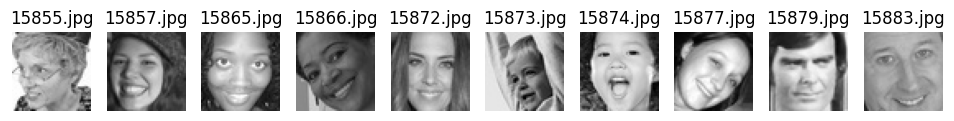

In [5]:
# Define the path to the 'happy' directory
happy_directory_path = train_directory_path + 'happy/'

# Get the names of the first few files in the 'happy' directory
sample_happy_images = os.listdir(happy_directory_path)[:10]

# Load and display each sample image
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(sample_happy_images, start=1):
    image_path = happy_directory_path + image_name
    img = load_img(image_path)
    plt.subplot(1, 10, i)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.show()

**Observations and Insights:**

Based on the sample of images, happiness is associated with laughing or a wide smile and often shows teeth. For happy people, their cheekbones often appear pronounced due to the contraction of the muscles in the face and they show crows feet, that is, wrinkles that form at the outer corners of the eyes. 

### **Sad**

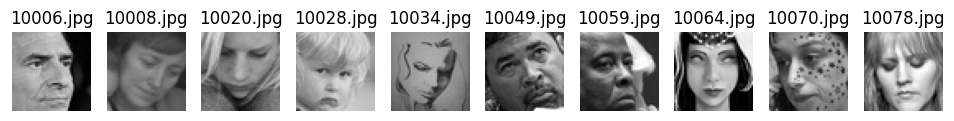

In [6]:
# Define the path to the 'happy' directory
sad_directory_path = train_directory_path + 'sad/'

# Get the names of the first few files in the 'happy' directory
sample_sad_images = os.listdir(sad_directory_path)[:10]

# Load and display each sample image
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(sample_sad_images, start=1):
    image_path = sad_directory_path + image_name
    img = load_img(image_path)
    plt.subplot(1, 10, i)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.show()

**Observations and Insights:**

Based on the sample of images, sad people have typically their corners of the mouth turning downward and the eyebrows in a sad expression re often lowered, creating a  furrowed look. 

### **Neutral**

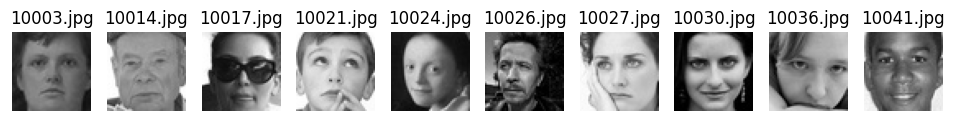

In [7]:
# Define the path to the 'happy' directory
neutral_directory_path = train_directory_path + 'neutral/'

# Get the names of the first few files in the 'happy' directory
sample_neutral_images = os.listdir(neutral_directory_path)[:10]

# Load and display each sample image
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(sample_neutral_images, start=1):
    image_path = neutral_directory_path + image_name
    img = load_img(image_path)
    plt.subplot(1, 10, i)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.show()

**Observations and Insights:**

Based on the sample of images, neutral expressions are characterized by facial mucles appearing relaxed without the tension that characterizes emotions. The mouth is typically cloesd and the teeth are not shown. In general the features such as eyes, eyebrows, and mouth do not exhhibit any significant upward or downward movement. 

### **Surprised**

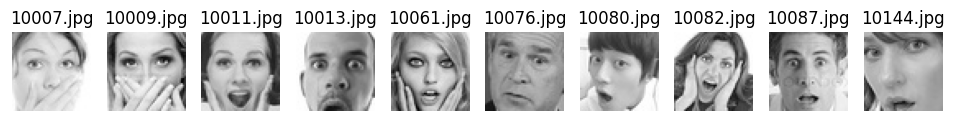

In [8]:
# Define the path to the 'happy' directory
surprise_directory_path = train_directory_path + 'surprise/'

# Get the names of the first few files in the 'happy' directory
sample_surprise_images = os.listdir(surprise_directory_path)[:10]

# Load and display each sample image
plt.figure(figsize=(12, 4))
for i, image_name in enumerate(sample_surprise_images, start=1):
    image_path = surprise_directory_path + image_name
    img = load_img(image_path)
    plt.subplot(1, 10, i)
    plt.imshow(img)
    plt.title(image_name)
    plt.axis('off')
plt.show()

**Observations and Insights:**

Based on the sample of images, surprise expressions often result in eyes being opened wider than usual, the eyebrows are generally lifted upwards and often curve. It is also common for the mouth to open wide without tension on the lips.

## **Checking Distribution of Classes**

Number of images in the train dataset':    15109
Number of images in the validation dataset':    4977
Number of images in the test dataset':    128
Number of images in the train dataset for each class':    {'happy': 3976, 'neutral': 3978, 'sad': 3982, 'surprise': 3173}
Number of images in the validation dataset for each class':    {'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}
Number of images in the test dataset for each class':    {'happy': 32, 'neutral': 32, 'sad': 32, 'surprise': 32}


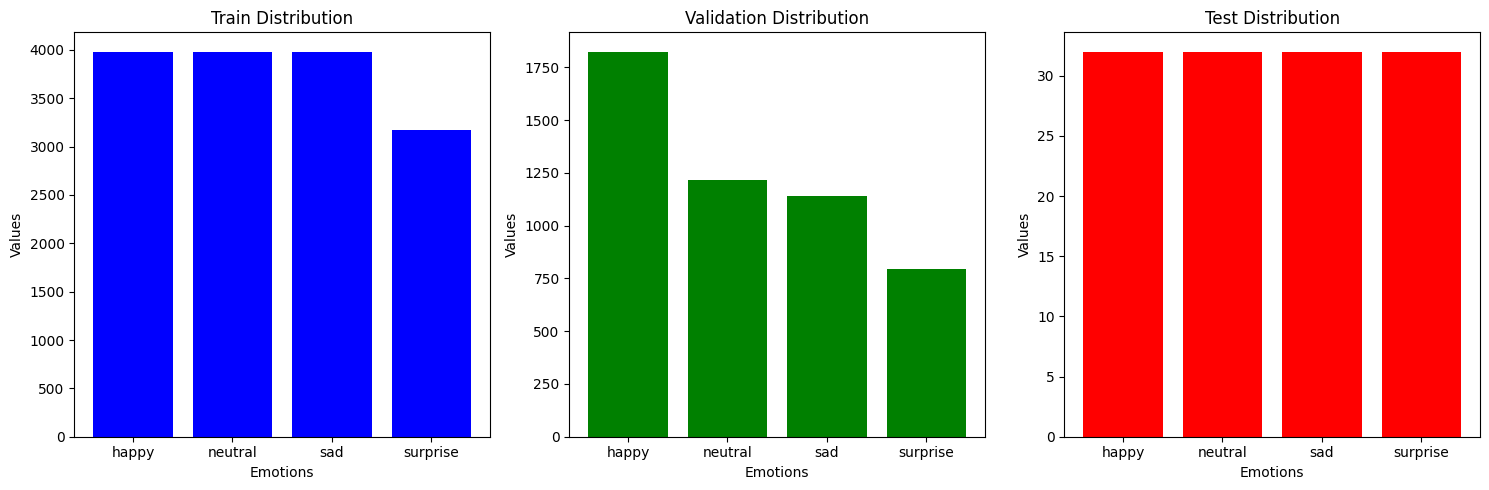

In [9]:
# Function to calculate the distribution of classes within the dataset.
# For each of the emotion categories, count the number of images.

def get_class_distribution(directory_path):
    class_distribution = {}
    for emotion_class in os.listdir(directory_path):
        class_path = os.path.join(directory_path, emotion_class)
        if os.path.isdir(class_path):
            class_distribution[emotion_class] = len(os.listdir(class_path))
    return class_distribution

# Calculate distribution for train, validation, and test sets
train_distribution = get_class_distribution(os.path.join(inner_directory_path, 'train'))
validation_distribution = get_class_distribution(os.path.join(inner_directory_path, 'validation'))
test_distribution = get_class_distribution(os.path.join(inner_directory_path, 'test'))

print("Number of images in the train dataset':   ",sum(train_distribution.values()))
print("Number of images in the validation dataset':   ",sum(validation_distribution.values()))
print("Number of images in the test dataset':   ",sum(test_distribution.values()))

print("Number of images in the train dataset for each class':   ",train_distribution)
print("Number of images in the validation dataset for each class':   ",validation_distribution)
print("Number of images in the test dataset for each class':   ",test_distribution)

# Create figure and axes objects for 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograms for each distribution with different colors
axes[0].bar(train_distribution.keys(), train_distribution.values(), color='blue')
axes[1].bar(validation_distribution.keys(), validation_distribution.values(), color='green')
axes[2].bar(test_distribution.keys(), test_distribution.values(), color='red')

# Setting labels and titles for each subplot
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Values')
axes[0].set_title('Train Distribution')

axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Values')
axes[1].set_title('Validation Distribution')

axes[2].set_xlabel('Emotions')
axes[2].set_ylabel('Values')
axes[2].set_title('Test Distribution')

# Show plot with a tight layout
plt.tight_layout()
plt.show()




**Check Pixel Intensity Distribution**


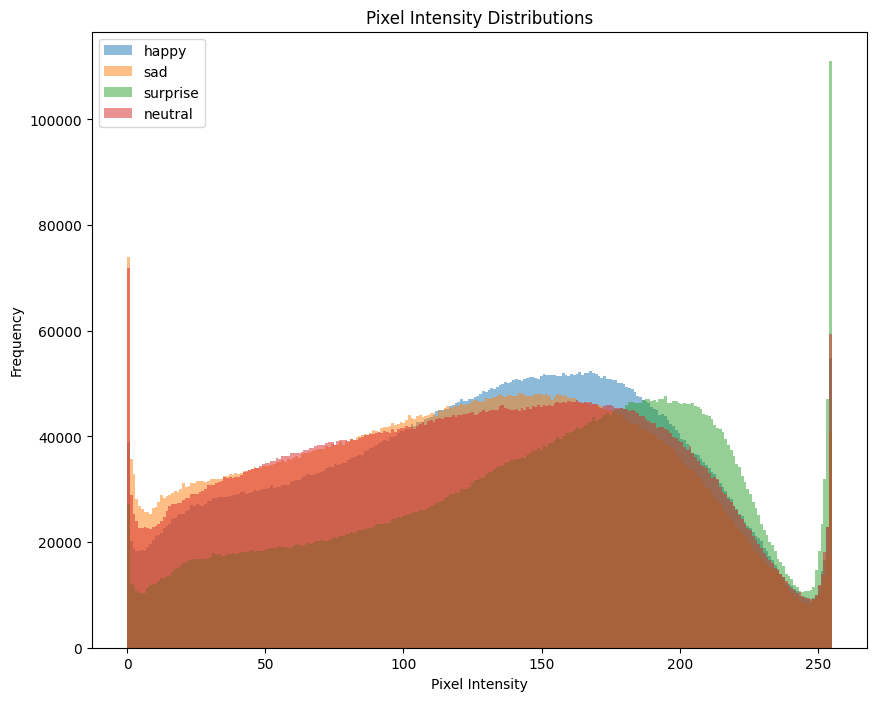

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Define the path to your dataset and classes
data_dir = os.path.join(inner_directory_path, 'train')
emotions = ['happy', 'sad', 'surprise', 'neutral']  

# Create a dictionary to hold the pixel intensity distributions
pixel_intensity_distributions = {emotion: [] for emotion in emotions}

# Loop through each class and each image within the class
for emotion in emotions:
    class_folder = os.path.join(data_dir, emotion)
    image_files = os.listdir(class_folder)
    
    for img_name in image_files:
        img_path = os.path.join(class_folder, img_name)
        # Read the image in grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Flatten the image to turn it into a one-dimensional array
        pixel_values = img.flatten()
        # Append the pixel values to the corresponding distribution in the dictionary
        pixel_intensity_distributions[emotion].extend(pixel_values)

# Now plot the distributions
plt.figure(figsize=(10, 8))
for emotion, intensities in pixel_intensity_distributions.items():
    # Use numpy to create a histogram of pixel intensities
    plt.hist(intensities, bins=256, range=(0, 255), alpha=0.5, label=emotion)

plt.title('Pixel Intensity Distributions')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

**Observations and Insights:**

The training set has a relatively balanced nuber of omages across the different classes, with each of these classes having close to 4000 images. The 'surprise' class has fewer images compared to the others, with 3173 images. This difference could potentially lead to a bias in a machine learning model trained on this data, where the performance could drop in recognizing the surprised expressions because of the fewer examples to learn from. In this case, the resultig model could be biased towards the other three classes with more images.  

In the validation set, there is a significant imbalance among the classes. The 'happy' class has the most images (1825) which is more than 50% larger than the 'surprise' class and substantially larger than the others. The imbalance can affect the performance during the training. A model might appear to perform well on the validation set simply because it is better at recognizing the more heavily represented classes. 

The test set is perfectly balanced, with each class represneted by 32 images. The scale of test distribution is however much smaller compared to the training and validation sets. This might not be enough to reliably estimate the model's performance on unseen data, especially if the model is complex. 

Ideally, all datasets should have a sufficient and proportional number of samples from each class to ensure the model's performance is evaluated accurately. In this regard, the imbalance in the 'surprise' category in the training and validation sets may result in poorer recognition of this particular emotion. 

When training a model, techniques such as class weighting, data augmentation, or oversampling for underrepresented classes could be used to mitigate the impact of this imbalance. 

The pixel intensity distribution has been analyzed because can provide insights into the variations within the images and indicate if normalization or other preprocessing techniques may be necessary. Observing the pixel intensity distribution, it is cear the the pixel values range from 0 to 255 for each dataset class. The peaks of the distributions are not aligned, henece it would be beneficial to apply normalization to ensure that all images have pixel intensities with a similar distribution. 
Furthermore, it seems that there is a significant peak at the higher end of the pixel intensity scale, indicating a lot of britght pixels. Histogram equalization can be used to redistribute the intensity distribution to span the entire range, which can improve the contrast of the images. 

In [11]:
from collections import Counter
from PIL import Image

# Initialize a list to hold the sizes of the images
image_sizes = []

# Walk through the directory and get the size of each image
for subdir, dirs, files in os.walk(inner_directory_path):
    for file in files:
        file_path = os.path.join(subdir, file)
        with Image.open(file_path) as img:
            image_sizes.append(img.size)

# Count the occurrences of each image size
size_counter = Counter(image_sizes)

size_counter

KeyboardInterrupt: 

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

**Obsevation**

The model created below is trained using grayscale images, but the same model has been trained using rgb images and the final accuracy plot and observations are reported below at the end of this section. 

 

In [12]:
# ImageDataGenerators: Generate batches of tensor image data with real-time data augmentation. It allows to augment the images in real-time while the model is still training. 
# Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. 
# Each copy is different from the other in certain aspects depending on the augmentation techniques applied like shifting, rotating, flipping, etc.
# Applying these small amounts of variations on the original image does not change its target class but only provide a new perspective of capturing the object in real life. 
# These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. 
# Also, the model becomes more robust when it is trained on new, slightly altered images. 

# ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. 
# This is where shuffling data comes in. Shuffling data involves randomly reordering the training data before each epoch.
# By shuffling the data, the model is exposed to different patterns in each epoch, which helps prevent it from overfitting to specific patterns in the training data. In other words, shuffling data helps the model to generalize better to new data.
# Shuffling the data before each epoch ensures that each batch contains a different mix of data, which helps the model to learn from different patterns in each epoch.
# mproves the speed of convergence by ensuring that each mini-batch contains a different mix of data, and improves the robustness of the model to changes in the data distribution. 

# Initially the color mode is set to 'grayscale' as it is more common in emotion detection.
# It also reduces the complexity of the model as it processes single-channel images instead of three-channel RGB images.

# Train datagen
train_datagen = ImageDataGenerator(rescale=1./255)

# Validation datagen
validation_datagen = ImageDataGenerator(rescale=1./255)

# Test datagen
test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size can be adjusted depending on the memory capacity
batch_size = 32

# 48x48 is the size of images
img_size = 48  

# Train data loader
train_loader = train_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'train'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='grayscale', # or 'rgb'  grayscale
    shuffle=True
)

# Validation data loader
validation_loader = validation_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'validation'),
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='grayscale' # or 'rgb'
)

# Test data loader
test_loader = test_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'test'),
    target_size=(img_size, img_size), 
    batch_size=1,
    class_mode='categorical', # multi-class classification
    color_mode='grayscale' # or 'rgb'
)



Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [14]:
from collections import Counter

counter = Counter(train_loader.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : np.minimum(max_val/num_images,3) for class_id, num_images in counter.items()}     
print(class_weights)


{0: 1.0015090543259557, 1: 1.0010055304172951, 2: 1.0, 3: 1.2549637566971321}


KeyboardInterrupt: 

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here? 




In the domain of facial emotion recognition, CNN are preferred over traditional ANN and the main reason is that they are designed to automatically and adaptively learn spatial hierarchies of features from input images. In CNNs, the same filters (shared weights) are applied across different parts of an image. This of course allows to reduce the omplexity because the number of parameters results fewer compared to a fully connected ANN, and consequently it makes the network less prone to overfitting and computationally omre efficient and easier to train, but in addition, it allows the network to detect features irrespective of their position in the image. 
CNNs can be designed with a deep architecture suitable for complex image recognition tasks. Deeper CNNs can learn a wide variety of features, from simple edges in the initial layers to complex patterns in the deeper layers. 
CNNs are more robust to variations and distortions in images, which is vital when working with diverse datasets of human faces that may have variations in lighting, facial orientation, and expressions. In fact, through the use of pooling layers, CNNs can develop a level of translation invariance, meaning the network can recognize a feature whether it's located in the corner or the center of the image. 

ANN do not inherently process spatial structure and pattern hierarchies in image data. ANNs treat input images as flat, one-dimensional vectors which can lead to a loss of spatial relationships between pixels.  
They also tend to have many more parameters when dealing with images, as each input pixel is connected to a neuron, leading to a higher chance of overfitting and making them computationally inefficient for large images.

Summarizing, CNNs are typically more appropriate than ANNs due to their ability to learn from the spatial structure of the images, their efficiency in parameter usage, and their ability to generalize from complex image data.




### **Creating the Base Neural Network**

The model here below is the baseline model, representing a simple CNN where the Sequential class is used to create a linear stack of layers for building the model layer by layer. 

 - Three sets of convolutional layers are added. 
 - Each set consists of a Conv2D layer followed by 'relu' activation and a MaxPooling2D. 
 - The number of filters increases in each set, capturing hierarchical features. 
 - The Flatten layer is added to transofrm the 2D array into a vector.
 - A fully conneted (Dense) layers follow, with relu activation.
 - Dropout layer is added to prevent overfitting .
 - The final layer is a Dense layer with 4 neurons, equal to the number of classes.
 - A softmax activation function, suitable for multi-class classification. 

In [ ]:
def cnn_model_1():

    # Create a sequential model
    model = Sequential()

    # Input layer 
    input_shape = (48, 48, 1) # Change to (48, 48, 3) for RGB images
    model.add(Input(shape=input_shape))

    # First convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output to feed into a dense layer
    model.add(Flatten())

    # Dense layer with ReLU activation
    model.add(Dense(64))
    model.add(Activation('relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output dense layer with softmax activation since we are handling a multi-class classification problem
    model.add(Dense(4)) # 4 classes
    model.add(Activation('softmax'))

    return model



In [ ]:
# Call the function and store the output in a new variable
cnn_model_1_instance = cnn_model_1()

# Print the summary of the model
cnn_model_1_instance.summary()


### **Compiling and Training the Model**

Depending on your dataset and the problem's complexity, you might want to experiment with additional layers, different filter sizes, more neurons in the dense layers, or other advanced features such as Batch Normalization and advanced regularization techniques.

ModelCheckpoint is a Keras callback to save model weights or entire model at a specific frequency or whenever a quantity (for example, training loss) is optimum when compared to last epoch/batch.

saves model weights or entire model in two formats (“tf” and “h5”) 

Why do we need ModelCheckpoint callback? 

If your mode is small and takes only a few seconds to train the model, then we don’t need to save weights during the training. But, what if your model is big and training takes hours or days? Sometimes, due to unexpected failures (ex. power failure) in the system or out of memory (OOM) issues causes the training process to stop and, restarting the training from scratch is costly and time consuming. 



The model is compiled with Adam optimizer, categorical crossentropy loss, which is appropriate for multi-class classification, and accuracy as the evaluation metric. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model 1
cnn_model_1_instance.compile(
    loss='categorical_crossentropy', # multi-class classification problem
    optimizer='adam',                # Adam optimizer
    metrics=['accuracy']             # reporting the accuracy of the model
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Model Checkpoint to save the best model during training
# ModelCheckpoint callback is used in conjunction with training using model.fit() 
# to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

checkpoint_filepath = extraction_path + '/results/ckpt_model_1/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

# `train_loader`, `validation_loader` have been defined using ImageDataGenerator and have the same batch size.

# Train the model
history_1 = cnn_model_1_instance.fit(
    train_loader,
    epochs=30,                                    # number of epochs to train the model
    validation_data=validation_loader,            # validation data
    callbacks=[early_stopping, model_checkpoint],  # callbacks for early stopping and model checkpoint
    class_weights=class_weights
)

# The 'history' object holds a record of the loss values and metric values during training


**Observation**

This code will start the training process, which involves the following steps:

    Training Loop: The fit function loops over the entire dataset a number of times defined by epochs.
    Backpropagation: During each loop, the network performs forward propagation, computes the loss, and updates the weights using backpropagation.
    Validation: After each epoch, the model is evaluated on the validation set, and the val_accuracy is monitored.

    Callbacks:
        EarlyStopping is used to stop training early if the val_loss does not improve for a given number of epochs (patience), preventing overfitting.
        ModelCheckpoint is used to save the weights only with the best validation loss.

After training, you should evaluate the model on the test set to check its performance on unseen data. Make sure you load the best model saved by the ModelCheckpoint before doing so. 

Remember, the batch size and number of epochs are hyperparameters that you may need to adjust based on the size of your dataset and the computational resources you have available. 


In [ ]:
# Plotting accuracy and loss together
plt.figure(figsize=(10, 6))

# First plot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Second plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### **Evaluating the Model on the Test Set**

After training your model, evaluating it on the test set is essential to gauge how well it might perform on unseen data. This evaluation will give you insights into the model's generalization capabilities. Here's an example of how to evaluate the model using Keras:

In [ ]:
# The model weights (that are considered the best) can be loaded as -
cnn_model_1_instance.load_weights(checkpoint_filepath)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model_1_instance.evaluate(test_loader)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


**Observations and Insights:**

The test accuracy indicates the proportion of correctly predicted instances in the test set. 
The performance on the test set is a good indicator of how well the model generalizes to new, unseen data. 

The training accuracy is increasing over the epochs. This suggests that the model is learning from the training data and is becoming better at making predictions for the data it has seen. 
The validation accuracy increases initially but then plateaus and fluctuates around a certain level without significant improvement. This is a sign of overfitting, where the model is learning to perform well on the training data but is not generalizing effectively to unseen data from the validation set.
In fact, there is a noticeable gap between the training and validation accuracies, suggesting that the model may be overfitting to the training data. 
The model may benefit from additional training epochs, but it is firstly important to counter overfitting by considering some specific strategies. 


To address the overfitting observed, the following strategies could be considered:

- Data Augmentation: Generate new training samples from the existing data by applying random transformations to increase the diversity of the training set.
- Regularization: Apply techniques like dropout, L1/L2 regularization to prevent the model weights from becoming too large.
- Early Stopping: Use early stopping to halt the training when the validation accuracy stops improving.
- Hyperparameter Tuning: Experiment with different learning rates, optimizers, and batch sizes to find a better set of parameters for training the model.


     


Comparing the model's performance using grayscale or rgb images, there is no additional useful information provided by rgb images for recognizing facial emotions. Instead,the model trained with rgb images gets slightly worse, with a final test accuracy of around 0.66% instead of 0.74 with grayscale images. 
The model might benefit from using rgb images, if the emotional expressions are influenced by color. 
Furthermore, it must be considered that rgb images increase the input dimensionality since color images have three channels compared to one channel for grayscale. This requires the model to have more parameters to learn from the additional color imformation. The training can be also more computationally expensive due to the increased imensionality. 
Grayscale images have a single channel and this reduction in dimensionality means there are fewer parameters to train within the network, which can significantly reduce the computational resources required such as memory and processing power. 

It must also be considered that, training on grayscale images, a CNN might become more adept at focusing on structural and textural information rather than relying on color information. This can lead to better performance in tasks where the shape, texture, and structural features are more critical for making accurate predictions or classifications than color, and from this experiment, that seems to be the case. 

Probably, the use of pretrained network, originally trained on rgb images, can be beneficial as these models have learned color features that could be transferable to this task. 

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# Clearing backend

from tensorflow.python.keras import backend

backend.clear_session()

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

**Observation**

Not all parameters of ImageDataGenerator class are relevant. It is neeeded to be careful about that. 
For example, a vertical flip has no meaning for this task and presumably could harm the precision of the model.

In [5]:
# Train datagen
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255)

# Validation datagen
validation_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255)

# Test datagen
test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size can be adjusted depending on the memory capacity
batch_size = 32

# 48x48 is the size of images
img_size = 48  

# Train data loader
train_loader = train_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'train'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='grayscale', # or 'rgb'  grayscale
    shuffle=True
)

# Validation data loader
validation_loader = validation_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'validation'),
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='grayscale' # or 'rgb'
)

# Test data loader
test_loader = test_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'test'),
    target_size=(img_size, img_size), 
    batch_size=1, 
    class_mode='categorical', # multi-class classification
    color_mode='grayscale' # or 'rgb'
)




Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


The model here below is a more complex model, representing a CNN where the Sequential class is used to create a linear stack of layers for building the model layer by layer. 

 - Six sets of convolutional layers are added. 
 - Each set consists of a Conv2D layer followed by 'relu' activation, BatchNormalization and MaxPooling2D. 
 - The number of filters increases in each set, capturing hierarchical features. 
 - The Flatten layer is added to transofrm the 2D array into a vector.
 - A fully conneted (Dense) layers follow, with relu activation.
 - Dropout layers are added to prevent overfitting .
 - The final layer is a Dense layer with 4 neurons, equal to the number of classes.
 - A softmax activation function, suitable for multi-class classification. 

Dropout is a form of regularization that could help prevent overfitting. BatchNomralization addresses the issue known as "internal covariate shift" where tje distribution of each layer's inputs changes during the training, as the parameters of the previous layers change. Hence, it acts as a form of regularization. 

For this second and more complex model, the data augmentation technique has been performed, considering some different transformations to the original images which results in multiple transformed copies of the same image. This just provides a new perspective of capturing the object in real life. A second technique performed during the training is the "Reduce Learning Rate on the Plateau". It basically reduce the learning rate when a metric (accuracy in this case) has stopped improving. 

The number of epochs has been increased in order to help the model to learn complex paterns. To avoid overfitting, the early stopping optimization technique is used.  

In [ ]:
def cnn_model_2():
    model = Sequential()

    # Input layer 
    input_shape = (48, 48, 1) # Change to (48, 48, 3) for RGB images
    model.add(Input(shape=input_shape))

    # First Convolutional layer
    model.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
    model.add(Activation('relu'))

    # First BatchNormalization layer
    model.add(BatchNormalization())

    # Second Convolutional layer
    model.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
    model.add(Activation('relu'))

    # Second BatchNormalization layer
    model.add(BatchNormalization())

    # First Max Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # First Dropout layer
    model.add(Dropout(0.4))
  
    # Third Convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))

    # Third BatchNormalization layer
    model.add(BatchNormalization())

    # Fourth Convolutional layer
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    
    # Fourth BatchNormalization layer
    model.add(BatchNormalization())

    # Second Max Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Dropout layer
    model.add(Dropout(0.4))
    
    # Fifth Convolutional layer
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    
    # Fifth BatchNormalization layer
    model.add(BatchNormalization())

    # Sixth Convolutional layer
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
    model.add(Activation('relu'))
    
    # Sixth BatchNormalization layer
    model.add(BatchNormalization())

    # Third Max Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    
    # Flatten the output
    model.add(Flatten())
    
    # Dense layer with 512 nodes
    model.add(Dense(128))
    model.add(Activation('relu'))

    # Seventh BatchNormalization layer
    model.add(BatchNormalization())
    model.add(Dropout(0.6))

    # Output layer with 4 nodes (number of classes) and softmax activation
    model.add(Dense(4, activation='softmax'))
    
    return model


In [ ]:
# Call the function and store the output in a new variable
cnn_model_2_instance = cnn_model_2()

# Print the summary of the model
cnn_model_2_instance.summary()


### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
cnn_model_2_instance.compile(
    loss='categorical_crossentropy', # multi-class classification problem
    optimizer='adam',                # using the Adam optimizer
    metrics=['accuracy']             # reporting the accuracy of the model
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Model Checkpoint to save the best model during training
# ModelCheckpoint callback is used in conjunction with training using model.fit() 
# to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

checkpoint_filepath = extraction_path + '/results/ckpt_model_2/checkpoint_batch32_rgb.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.5,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.001)

# Train the model
history_2 = cnn_model_2_instance.fit(
    train_loader,
    epochs=100,                                 # number of epochs to train the model
    validation_data=validation_loader,         # validation data
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate],  # callbacks for early stopping and model checkpoint
    class_weights=class_weights
)

# The 'history' object holds a record of the loss values and metric values during training


In [ ]:
# Plotting accuracy and loss together
plt.figure(figsize=(10, 6))

# First plot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Second plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
# The model weights (that are considered the best) can be loaded as -
cnn_model_2_instance.load_weights(checkpoint_filepath)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model_2_instance.evaluate(test_loader)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

In [ ]:
from keras_preprocessing.image import load_img

label = ['happy', 'neutral', 'sad', 'surprise']

def ef(image):
    img = load_img(image, color_mode = "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

image = inner_directory_path + 'test/happy/15801.jpg'
print("original image is of happy")
img = ef(image)
pred = cnn_model_2_instance.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

**Observations and Insights:**

The accuracy and loss plots show model'sperformance over approximately 35 epochs. 
In the accuracy plot, there is a steep improvement in both training and validation curves during the initial few epochs. This could suggest that the model is effectively learning patterns from the data. Then, both curves show a trend toward convergence, with training accuracy increasing at a slower rate and validation accuracy leveling off. This means that the initial rapid learning has plateaued. Aroud epoch 10 and beyond, the training accuracy continues to improve or maintain a high level whereas the validation accuracy shows more variability and a slight downward trend. This could be an early sign of overfitting, where the model is starting to learn noise and specificities of the trainin data that do not generalize to the validation data.
The negative spike around epoch 35 might indicate that the model is sensitive to certain batches or aspects of the data.

Overall, the enhanced performance of this model compared to Model 1 (the baseline) indicates that the strategic expansion of the network architecture—with additional convolutional layers, max pooling, batch normalization, and dropout layers—coupled with the implementation of data augmentation and a reduced learning rate upon plateau, contributes significantly to an increase in test dataset accuracy while mitigating overfitting. These adaptations suggest a more sophisticated feature extraction capability and robustness in the model. Consequently, this refined model demonstrates superior generalization to unseen data. 

Stochastic gradient descent maintains a single learning rate for all weight updates and the learning rate does not change during training. Adam optimezer adjust the learning rate automatically during the traing. Adam works well in practice and compares favorably to other stochastic optimization methods. 

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# Train datagen
train_datagen = ImageDataGenerator(rescale = 1./255,                                
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

# Validation datagen
validation_datagen = ImageDataGenerator(rescale = 1./255,                                
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

# Test datagen
test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size can be adjusted depending on the memory capacity
batch_size = 64

# 48x48 is the size of images
img_size = 48  

# Train data loader
train_loader = train_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'train'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='rgb', # or 'rgb'
    shuffle=True
)

# Validation data loader
validation_loader = validation_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'validation'),
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='rgb' # or 'rgb'

)

# Test data loader
test_loader = test_datagen.flow_from_directory(
    os.path.join(inner_directory_path, 'test'),
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode='categorical', # multi-class classification
    color_mode='rgb' # or 'rgb'
)


In [ ]:
inner_directory_path

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3), pooling = 'max')
vgg.summary()

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Load the VGG16 model without the top layer (fully-connected layers)
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the VGG16 model so they won't be trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained VGG16 model (without the top layers) to the Sequential model
model.add(pretrained_model)

# Flatten the output of the VGG16 convolutional layers
model.add(Flatten())

# Add custom fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # Helps with faster convergence
model.add(Dropout(0.5))

# The output layer needs the number of classes from the training data
num_classes = len(train_loader.class_indices)  
model.add(Dense(num_classes, activation='softmax'))  # softmax for multi-class classification

# Summary of the model
model.build(input_shape=(None, 48, 48, 3))
model.summary()

### **Compiling and Training the VGG16 Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

checkpoint_filepath = extraction_path + '/results/ckpt_model_vgg16/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.5,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.001)



# Train the model
history = model.fit(
    train_loader,
    steps_per_epoch=train_loader.samples // train_loader.batch_size,
    epochs=100,
    validation_data=validation_loader,
    #alidation_steps=validation_loader.samples // validation_loader.batch_size
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate],
    class_weights=class_weights)

In [ ]:
# Plotting accuracy and loss together
plt.figure(figsize=(10, 6))

# First plot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model VGG16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Second plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model VGG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### **Evaluating the VGG16 model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_loader, steps=test_loader.samples // test_loader.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

**Observations and Insights:**

The training accuracy shows quite a bit of fluctuation throughout the training process. This could be a sign of a high learning rate where the model's parameters are being updated too aggressively, causing it to overshoot the optimal values. 
The validation accuracy appears to be more stable than the training accuracy but does not show a clear upward trend. This could indicate that the model is not effectively learning from the data, which might be due to a number of reasons such as inadequate feature extraction from the fixed VGG16 layers or a suboptimal architecture of the added fully connected layers. 
Both the training and validation accuracies are relatively low (hovering around 50% for validation), suggesting that the model is performing only slightly better than random guessing for a balanced dataset with more than two classes. This might be improved by various means such as data augmentation, hyperparameter tuning, or using a more complex model architecture.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
def cnn_model_2(input_tensor):
    # First Convolutional layer
    x = Conv2D(64, kernel_size=(5, 5), padding='same')(input_tensor)
    x = Activation('relu')(x)

    # First BatchNormalization layer
    x = BatchNormalization()(x)

    # Repeat similarly for the rest of the layers...

    # Before the last Dense layer, flatten the output
    x = Flatten()(x)

    # Dense layer with 128 nodes
    x = Dense(128)(x)
    x = Activation('relu')(x)

    # Seventh BatchNormalization layer
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)

    # Output layer with 4 nodes (number of classes) and softmax activation
    x = Dense(4, activation='softmax')(x)
    
    return x


# Instantiate a Sequential model
model = Sequential()

# Load the VGG16 model without the top layer (fully-connected layers)
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the layers of the VGG16 model so they won't be trainable
pretrained_model.trainable = False

# Use the output of VGG16 as input for your custom layers
cnn_model_2_instance  = cnn_model_2(pretrained_model.output)

# Create the final model
model = Model(inputs=pretrained_model.input, outputs=cnn_model_2_instance )

# Summary of the model
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1)

checkpoint_filepath = extraction_path + '/results/ckpt_model_vgg16/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.3,
                              patience = 5,
                              verbose = 1,
                              min_delta = 1e-6)



# Train the model
history = model.fit(
    train_loader,
    steps_per_epoch=train_loader.samples // train_loader.batch_size,
    epochs=100,
    validation_data=validation_loader,
    #alidation_steps=validation_loader.samples // validation_loader.batch_size
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate],
    class_weights=class_weights)

In [ ]:
# Plotting the accuracies for model 

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Observation**

The VGG16 model, a deep learning architecture well-versed in image recognition, has been adopted as the foundational framework for this task. The utilization of pretrained models is strategic; it draws upon insights gleaned from expansive and varied datasets, enabling effective generalization to new, data-scarce tasks while also reducing the necessity for extensive training time and computational expenditure.
The network is built upon the VGG16 architecture, where the final classification layers have been replaced by those from the custom-built cnn_model_2. This alteration aims to tailor the network's output to the specifics of the new task at hand. To retain the integrity of the learned features, the early layers of the VGG16 model have been rendered non-trainable. These layers are instrumental in detecting universal patterns and attributes that have a high probability of relevance to the new dataset.
The accuracy plot shows the training and validation accuracy of the final model over 60 epochs. The training accuracy, despite its erratic behavior, showcases an overarching positive trend, implying that learning is indeed taking place, nonetheless, the pronounced swings point towards instability in the learning progression. In contrast, the validation accuracy demonstrates a more stability, but stagnates around the 50% mark. It does not show significant improvement after a certain number of epochs, which might suggest that the model is not generalizing well beyond the training set or that it has reached its capacity for the given architecture and data.
Despite these efforts, the model's advancement plateaus prematurely, indeed the final model does not align perfectly with the target task or domain, leading to suboptimal performance compared to the model_cnn_2's performance.

An alternative route to potentially elevate performance would be to train the model from scratch, but it is time-consuming and computationally expensive.
Furthermore, it would be interesting to consider intermediary steps such as fine-tuning more layers of the VGG16 model, or exploring alternative architectures that might align more closely with the characteristics of the task at hand.

## **ResNet V2 Model**

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications import ResNet50V2

# Load the ResNet50V2 model pre-trained on ImageNet data
model = ResNet50V2(weights='imagenet', include_top=True)  # use `include_top=False` to exclude the final fully-connected layer

# Display the model's architecture
model.summary()

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Input

model = Sequential()

# Load the  model pre-trained on ImageNet data
pretrained_model = ResNet50V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(48, 48, 3)))

# Freeze the layers of the base model
#for layer in pretrained_model.layers:
    #layer.trainable = False

for layer in pretrained_model.layers[:-4]:
    layer.trainable=False

# Add the pre-trained ResNet50V2 model (without the top layers) to the Sequential model
model.add(pretrained_model)

model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

num_classes = len(train_loader.class_indices)  
model.add(Dense(num_classes,activation='softmax'))

""" # Add new layers on top for custom classification
model.add(GlobalAveragePooling2D())                 # Add a global spatial average pooling layer
model.add(Dense(1024, activation='relu'))           # Add a fully connected layer
model.add(Dropout(0.5))                             # Add a dropout layer for regularization

num_classes = len(train_loader.class_indices)  
model.add(Dense(num_classes, activation='softmax'))  # 4 classes

model.build(input_shape=(None, 48, 48, 3)) """

# View the structure of the model
model.build(input_shape=(None, 48, 48, 3))
model.summary()

### **Compiling and Training the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

checkpoint_filepath = extraction_path + '/results/ckpt_model_resnet2v50/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.5,
                              patience = 5,
                              verbose = 1,
                              min_delta = 1e-10)



# Train the model
history = model.fit(
    train_loader,
    #steps_per_epoch=train_loader.samples // train_loader.batch_size,
    epochs=100,
    validation_data=validation_loader,
    #alidation_steps=validation_loader.samples // validation_loader.batch_size
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate],
    class_weights=class_weights)

In [ ]:
    
# Plotting accuracy and loss together
plt.figure(figsize=(10, 6))

# First plot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Second plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

### **Evaluating the ResNet Model**

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_loader, steps=test_loader.samples // test_loader.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

**Observations and Insights:** 

The ResNet50V2 model has been imported with include_top=False, which means the top fully connected layer is not included.
All the layers of the base model have been freezed to prevent them from being updated during the first phase of training.
A global average pooling layer and several fully connected layers, including a dropout layer for regularization have been added to the preexisting model.

Observing the model's metric,the training accuracy shows a steady increase over time, which suggests that the model is learning and improving its predictions on the training dataset. 
The validation accuracy also increases but at a slightly lower rate than the training accuracy.
There is a visible gap between training and validation accuracy, which may indicate overfitting. However, the gap is not widening significantly over time, which is positive.
The training loss decreases rapidly initially and then more gradually, indicating good learning progress. 
Similar to the validation accuracy, the validation loss decreases but has more fluctuation and appears to plateau towards the end of the epochs.
Both training and validation loss are still trending downward, which suggests that the model could potentially continue to improve with more epochs. 
Indeed, since the loss is still decreasing, the network training could continue for more epochs until the loss plateaus. In this training step, the early stopping has been applied with a patience parameter of 10. 
The model is hence learning and improving but might benefit from additional training, hyperparameter tuning, and regularization to further enhance its performance and generalization.



**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

In [ ]:
def cnn_model_2(input_tensor):
    # First Convolutional layer
    x = Conv2D(64, kernel_size=(5, 5), padding='same')(input_tensor)
    x = Activation('relu')(x)

    # First BatchNormalization layer
    x = BatchNormalization()(x)

    # Repeat similarly for the rest of the layers...

    # Before the last Dense layer, flatten the output
    x = Flatten()(x)

    # Dense layer with 128 nodes
    x = Dense(128)(x)
    x = Activation('relu')(x)

    # Seventh BatchNormalization layer
    x = BatchNormalization()(x)
    x = Dropout(0.6)(x)

    # Output layer with 4 nodes (number of classes) and softmax activation
    x = Dense(4, activation='softmax')(x)
    
    return x


# Instantiate a Sequential model
model = Sequential()

# Load the  model pre-trained on ImageNet data
pretrained_model = ResNet50V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(48, 48, 3)))

# Freeze the layers of the VGG16 model so they won't be trainable
pretrained_model.trainable = False

# Use the output of VGG16 as input for your custom layers
cnn_model_2_instance  = cnn_model_2(pretrained_model.output)

# Create the final model
model = Model(inputs=pretrained_model.input, outputs=cnn_model_2_instance )

# Summary of the model
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1)

checkpoint_filepath = extraction_path + '/results/ckpt_model_resnet_2/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.3,
                              patience = 5,
                              verbose = 1,
                              min_delta = 1e-6)



# Train the model
history = model.fit(
    train_loader,
    #steps_per_epoch=train_loader.samples // train_loader.batch_size,
    epochs=100,
    validation_data=validation_loader,
    #alidation_steps=validation_loader.samples // validation_loader.batch_size
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate],
    class_weights=class_weights)

## **EfficientNet Model**

In [6]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Input

model = Sequential()

# Load the EfficientNetB0 model pre-trained on ImageNet data
pretrained_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=Input(shape=(48, 48, 3)))

#for layer in pretrained_model.layers:
 #   layer.trainable=False


# Add the pre-trained EfficientNetB0 model (without the top layers) to the Sequential model
model.add(pretrained_model)

# Add new layers on top for custom classification

model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
num_classes = len(train_loader.class_indices)  
model.add(Dense(num_classes,activation='softmax'))

model.build(input_shape=(None, 48, 48, 3))

# View the structure of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 2, 2, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,365,415 (20.47 MB)

 Trainable params: 5,323,392 (20.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

### **Compiling and Training the Model**

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Compile the model
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1)

checkpoint_filepath = extraction_path + '/results/ckpt_model_efficientNet/checkpoint.weights.h5'

model_checkpoint = ModelCheckpoint(
    checkpoint_filepath, 
    monitor='val_accuracy', 
    save_best_only=True, 
    save_weights_only=True, 
    verbose=1
)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.5,
                              patience = 5,
                              verbose = 1,
                              min_delta = 1e-10)



# Train the model
history = model.fit(
    train_loader,
    #steps_per_epoch=train_loader.samples // train_loader.batch_size,
    epochs=100,
    validation_data=validation_loader,
    #alidation_steps=validation_loader.samples // validation_loader.batch_size
    callbacks=[early_stopping, model_checkpoint, reduce_learningrate])

Epoch 1/100


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4246 - loss: 1.3227
Epoch 1: val_accuracy improved from -inf to 0.20494, saving model to Facial_emotion_images//results/ckpt_model_efficientNet/checkpoint.weights.h5
473/473 ━━━━━━━━━━━━━━━━━━━━ 188s 313ms/step - accuracy: 0.4247 - loss: 1.3224 - val_accuracy: 0.2049 - val_loss: 1.5103 - learning_rate: 0.0010
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.5865 - loss: 0.9923
Epoch 2: val_accuracy improved from 0.20494 to 0.62889, saving model to Facial_emotion_images//results/ckpt_model_efficientNet/checkpoint.weights.h5
473/473 ━━━━━━━━━━━━━━━━━━━━ 139s 294ms/step - accuracy: 0.5865 - loss: 0.9923 - val_accuracy: 0.6289 - val_loss: 0.8846 - learning_rate: 0.0010
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6462 - loss: 0.8690
Epoch 3: val_accuracy did not improve from 0.62889
473/473 ━━━━━━━━━━━━━━━━━━━━ 145s 307ms/step - accuracy: 0.6462 - loss: 0.8690 - val_accuracy: 0.5535 - val_l

KeyboardInterrupt: 

### **Evaluating the EfficientnetNet Model**

NameError: name 'history' is not defined

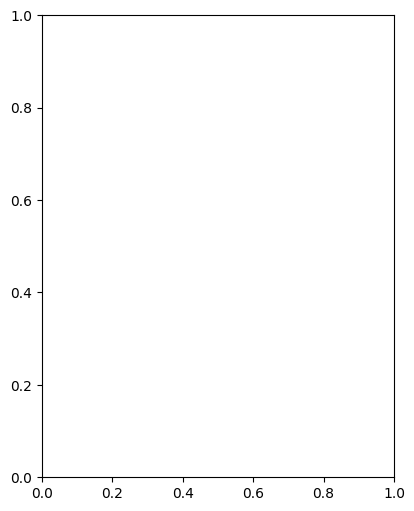

In [11]:
    
# Plotting accuracy and loss together
plt.figure(figsize=(10, 6))

# First plot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model ResNet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


# Second plot for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model ResNet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Show the plots
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()




In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_loader, steps=test_loader.samples // test_loader.batch_size)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

**Observations and Insights:**

I created the function build_model that loads the EfficientNetB0 model pre-trained on ImageNet (without its original classifier) and adds 3 more layers at its top as you can see below. The idea of picking just 3 layers (and not something more complicated) came from the official documentation of Keras that shows how to fine-tune EfficientNet on an Image classification. Additionally, this function compiles the model with an Adam optimizer, a categorical cross-entropy loss function, and accuracy as a metric.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

### **Compiling and Training the Model**

### **Evaluating the Model on Test Set**

**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?